In [47]:
# BUT - before that... let's create a quick template for building models... Algorithm Harness

In [48]:
#Import your Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/fenago/classify/main/data/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Notes
This session covers data collection and some procedures of data preparation.

Commands, functions, and methods:

!wget - Linux shell command for downloading data
pd.read.csv() - read csv files
df.head() - take a look of the dataframe
df.head().T - take a look of the transposed dataframe
df.columns - retrieve column names of a dataframe
df.columns.str.lower() - lowercase all the letters
df.columns.str.replace(' ', '_') - replace the space separator
df.dtypes - retrieve data types of all series
df.index - retrive indices of a dataframe
pd.to_numeric() - convert a series values to numerical values. The errors=coerce argument allows making the transformation despite some encountered errors.
df.fillna() - replace NAs with some value
(df.x == "yes").astype(int) - convert x series of yes-no values to numerical values.
df['Weight'] = df['Weight'].astype(int) - this takes a single column of data and converts the data type

In [50]:
len(df)

12330

In [51]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [52]:
df.shape

(12330, 18)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [54]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [55]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [56]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [57]:
df.head()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,feb,1,1,1,1,returning_visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,feb,2,2,1,2,returning_visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,feb,4,1,9,3,returning_visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,feb,3,2,2,4,returning_visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,feb,3,3,1,4,returning_visitor,True,False


In [58]:
# 999999999 - several values of that in the income, assets, and debt column
# if you ever need to replace values in a col -> here is your template for that
# for c in ['income', 'assets','debt']:
#  df[c] = df[c].replace(to_replace=99999999,value=np.nan)
# df = df[df.status != 'unk']
df.nunique()

administrative               27
administrative_duration    3335
informational                17
informational_duration     1258
productrelated              311
productrelated_duration    9551
bouncerates                1872
exitrates                  4777
pagevalues                 2704
specialday                    6
month                        10
operatingsystems              8
browser                      13
region                        9
traffictype                  20
visitortype                   3
weekend                       2
revenue                       2
dtype: int64

In [59]:
df['revenue'].unique()

array([False,  True])

In [60]:
df['revenue'].value_counts()

False    10422
True      1908
Name: revenue, dtype: int64

In [61]:
# df = df[df.status != 0]
df.revenue.value_counts() 

False    10422
True      1908
Name: revenue, dtype: int64

<Figure size 600x400 with 0 Axes>

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot: xlabel='revenue', ylabel='Count'>

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'revenue')

Text(0.5, 1.0, 'revenue')

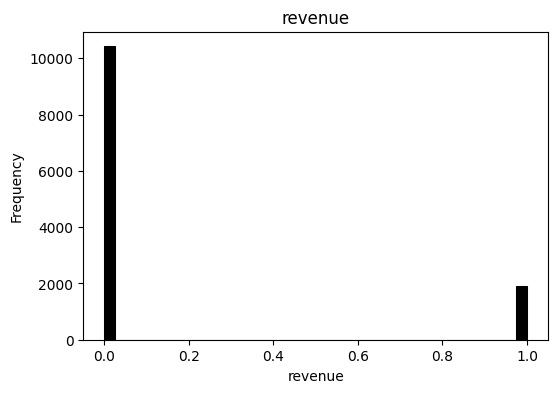

In [62]:
# Replace with your target variable --- df.YOUR_TARGET_VARIABLE  
# Look for major data imbalances
# Also replace your X label
# REPLACE YOUR TARGET VARIABLE
plt.figure(figsize=(6, 4))

sns.histplot(df.revenue, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('revenue')
plt.title('revenue')

plt.show()

Notes
(1) Check for NaN under a single DataFrame column:

df['your column name'].isnull().values.any()

(2) Count the NaN under a single DataFrame column:

df['your column name'].isnull().sum()

(3) Check for NaN under an entire DataFrame:
df.isnull().values.any()

(4) Count the NaN under an entire DataFrame:
df.isnull().sum().sum()

In [63]:
# Check for nulls --- you do NOT want nulls when you train
df.isnull().sum()

administrative             0
administrative_duration    0
informational              0
informational_duration     0
productrelated             0
productrelated_duration    0
bouncerates                0
exitrates                  0
pagevalues                 0
specialday                 0
month                      0
operatingsystems           0
browser                    0
region                     0
traffictype                0
visitortype                0
weekend                    0
revenue                    0
dtype: int64

In [64]:
#delete columns --- this may or may NOT be needed.  As before - skip if you don't need it
# You will encounter times where you will want to delete columns.  This is how you do that.
# df = df.drop(['x5_latitude', 'x6_longitude', 'x1_transaction_date'], axis=1)
# df

In [65]:
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

len(df_train_full), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train_full = df_train_full.fillna(0)

df_test = df_test.fillna(0)
len(df_train_full),len(df_test)

(9864, 2466)

(9864, 2466)

In [66]:
#Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (df_train_full.revenue).values
y_test = (df_test.revenue).values
del df_train_full['revenue']
del df_test['revenue']

In [67]:
len(y_train),len(y_test)


(9864, 2466)

In [68]:
# Convert these data frames into a LIST of DICTIONARIES (each element in the list is a dictionary (the record))
# IF YOU HAVE CAT values... we need to encode them... pandas get dummies OR dictionary vectorizor OR several other examples... allow us to encode
# this example will work with ANY cat data.
dict_train = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

In [69]:
# Convert the LIST OF DICTIONARIES into a Feature Matrix (does all of the encoding)
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
 
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)
features = dv.feature_names_  #Features as they exist in the Vectorized Dictionary (this is an ndarray)

In [70]:
features

['administrative',
 'administrative_duration',
 'bouncerates',
 'browser',
 'exitrates',
 'informational',
 'informational_duration',
 'month=aug',
 'month=dec',
 'month=feb',
 'month=jul',
 'month=june',
 'month=mar',
 'month=may',
 'month=nov',
 'month=oct',
 'month=sep',
 'operatingsystems',
 'pagevalues',
 'productrelated',
 'productrelated_duration',
 'region',
 'specialday',
 'traffictype',
 'visitortype=new_visitor',
 'visitortype=other',
 'visitortype=returning_visitor',
 'weekend']

In [71]:
X_test.shape

(2466, 28)

LogisticRegression(solver='liblinear')

LR: 0.882809 (0.010095)
Score for each of the 10 K-fold tests:  [0.87639311 0.8733536  0.88855117 0.86423506 0.87829615 0.88235294
 0.88336714 0.89148073 0.88742394 0.90263692]
LogisticRegression(solver='liblinear')
	Training time: 0.197s
	Prediction time: 1.704s



LinearDiscriminantAnalysis()

LDA: 0.879058 (0.011674)
Score for each of the 10 K-fold tests:  [0.87234043 0.86828774 0.88449848 0.85815603 0.87119675 0.88032454
 0.87829615 0.88640974 0.88945233 0.90162272]
LinearDiscriminantAnalysis()
	Training time: 0.075s
	Prediction time: 0.595s



KNeighborsClassifier()

KNN: 0.862836 (0.007338)
Score for each of the 10 K-fold tests:  [0.86524823 0.85714286 0.85309017 0.86018237 0.86713996 0.85192698
 0.86004057 0.87626775 0.87018256 0.86713996]
KNeighborsClassifier()
	Training time: 0.006s
	Prediction time: 1.460s



DecisionTreeClassifier()

CART: 0.862935 (0.006073)
Score for each of the 10 K-fold tests:  [0.86119554 0.85714286 0.86018237 0.87943262 0.86004057 0.85801217
 0.86409736 0.86308316 0.86612576 0.86004057]
DecisionTreeClassifier()
	Training time: 0.071s
	Prediction time: 0.753s



GaussianNB()

NB: 0.793798 (0.016627)
Score for each of the 10 K-fold tests:  [0.81661601 0.75481256 0.7993921  0.78419453 0.77991886 0.79918864
 0.80020284 0.79107505 0.80324544 0.80933063]
GaussianNB()
	Training time: 0.016s
	Prediction time: 0.153s



SVC(gamma='auto')

SVM: 0.845804 (0.009630)
Score for each of the 10 K-fold tests:  [0.84194529 0.85309017 0.85410334 0.82674772 0.83874239 0.8336714
 0.85496957 0.84989858 0.85699797 0.84787018]
SVC(gamma='auto')
	Training time: 19.742s
	Prediction time: 162.476s



Text(0.5, 0.98, 'Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6c8077130>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6c8077670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6c8076e90>,
 'medians': [<matplotlib.lines.Line2D at 0x1c6c8077bb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c6c8077e50>,
 'means': []}

[Text(1, 0, 'LR'),
 Text(2, 0, 'LDA'),
 Text(3, 0, 'KNN'),
 Text(4, 0, 'CART'),
 Text(5, 0, 'NB'),
 Text(6, 0, 'SVM')]

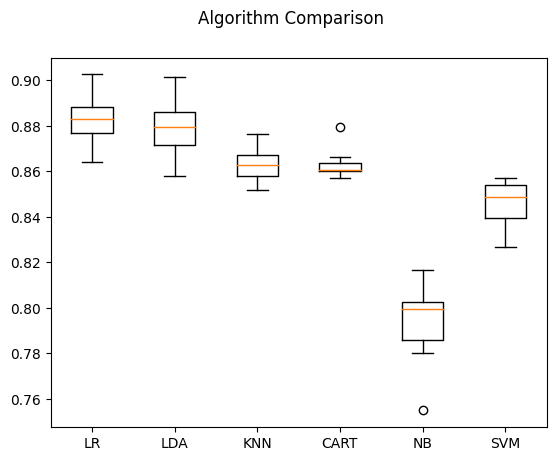

In [72]:
# Compare Algorithms with the Algorithm Harness
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
# scoring = 'roc_auc'
scoring = 'accuracy'
# you can also use other metrics to score your models: https://iqcode.com/code/python/sklearn-cross-val-score-scoring-options
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [73]:
# once you have identified a couple of models... being to drill down and tweak it
# %%timeit -n 1
# if you uncomment %%timeit it will not put lr into memory
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)  # in this step here... you are training the data to the model... ie:  fitting the data to the model

DecisionTreeClassifier()

In [74]:
# This will give you the list of Hyperparameters of your model
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [75]:
# You have converted the dataframe into a list of dictionaries - validate the headers
type(X_train)
type(dv.feature_names_)
type(dt.feature_importances_)
dv.feature_names_

numpy.ndarray

list

numpy.ndarray

['administrative',
 'administrative_duration',
 'bouncerates',
 'browser',
 'exitrates',
 'informational',
 'informational_duration',
 'month=aug',
 'month=dec',
 'month=feb',
 'month=jul',
 'month=june',
 'month=mar',
 'month=may',
 'month=nov',
 'month=oct',
 'month=sep',
 'operatingsystems',
 'pagevalues',
 'productrelated',
 'productrelated_duration',
 'region',
 'specialday',
 'traffictype',
 'visitortype=new_visitor',
 'visitortype=other',
 'visitortype=returning_visitor',
 'weekend']

In [76]:
# These are the model properties.  You can call all of these
def get_properties(model):   
  return [i for i in model.__dict__ if i.endswith('_')] 
get_properties(dt)

['n_features_in_',
 'n_outputs_',
 'classes_',
 'n_classes_',
 'max_features_',
 'tree_']

In [77]:
# Very important.  Once you have a trained model - interegate the coefficients to see WHAT is important
feature_names=dv.feature_names_
# Evaluate the coefficients to learn what the model thinks is important in the predictions.
for i,j in zip(feature_names, dt.feature_importances_): print('%.3f' % j, i)

0.039 administrative
0.052 administrative_duration
0.081 bouncerates
0.016 browser
0.076 exitrates
0.015 informational
0.022 informational_duration
0.001 month=aug
0.007 month=dec
0.000 month=feb
0.002 month=jul
0.001 month=june
0.008 month=mar
0.005 month=may
0.024 month=nov
0.005 month=oct
0.004 month=sep
0.013 operatingsystems
0.416 pagevalues
0.064 productrelated
0.084 productrelated_duration
0.029 region
0.002 specialday
0.017 traffictype
0.002 visitortype=new_visitor
0.001 visitortype=other
0.004 visitortype=returning_visitor
0.009 weekend


Text(0, 0, '1904')

Text(1, 0, '173')

Text(0, 1, '174')

Text(1, 1, '215')

Text(0.5, 0, 'Predictions')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.0, 'Confusion Matrix')

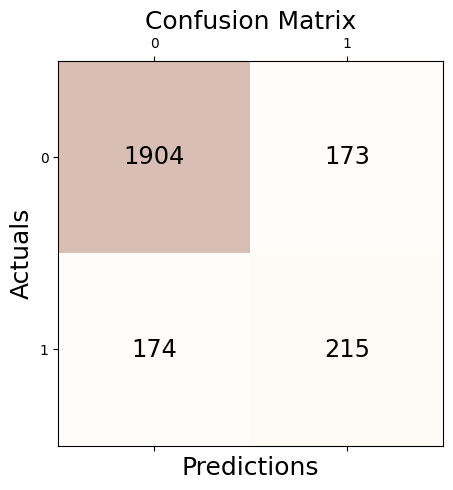

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# predict_proba predicts the probability and predict just predicts the category
# y_pred = dt.predict_proba(X_test)[:, 1]
y_pred = dt.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [79]:
#VVI : since confusion matrix shows that the model is better at predicting who WILL NOT buy we should frame the business question as who will not buy and tune the hyperparameters on that

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.92      0.92      2077
        True       0.55      0.55      0.55       389

    accuracy                           0.86      2466
   macro avg       0.74      0.73      0.73      2466
weighted avg       0.86      0.86      0.86      2466



In [80]:
# Take a peek at your predictions:
# Take a look at the first 10 rows and compare the predictions.
pred_y = dt.predict(X_test)
print("The first 10 prediction {}".format(pred_y[:10].round(0)))
print("The real first 10 labels {}".format(y_test[:10]))

The first 10 prediction [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The real first 10 labels [False False False False False False False False False  True]


In [81]:
# How to make predictions with BRAND NEW VALUES
type(df_train_full.head(1))

pandas.core.frame.DataFrame

In [82]:
# Use double brackets around the iloc to force it to return a pandas dataframe and not a series
# Then you can convert ANY record into a dictionary.
# This is important because when you want to make a prediction - it must be in this format
df_train_full.iloc[[21]]

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend
10683,9,227.375,4,102.25,48,2849.482143,0.0,0.014854,4.741626,0.0,nov,2,2,4,2,returning_visitor,False


In [83]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.iloc[[213]].to_dict('records')[0]

{'administrative': 7,
 'administrative_duration': 103.6,
 'informational': 0,
 'informational_duration': 0.0,
 'productrelated': 72,
 'productrelated_duration': 1933.559259,
 'bouncerates': 0.005333333,
 'exitrates': 0.026377261,
 'pagevalues': 7.806338478,
 'specialday': 0.0,
 'month': 'sep',
 'operatingsystems': 2,
 'browser': 2,
 'region': 6,
 'traffictype': 2,
 'visitortype': 'returning_visitor',
 'weekend': False}

In [84]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train_full.head(21).to_dict('records')[0]

{'administrative': 0,
 'administrative_duration': 0.0,
 'informational': 0,
 'informational_duration': 0.0,
 'productrelated': 30,
 'productrelated_duration': 849.75,
 'bouncerates': 0.077419355,
 'exitrates': 0.112903226,
 'pagevalues': 0.0,
 'specialday': 0.8,
 'month': 'may',
 'operatingsystems': 2,
 'browser': 2,
 'region': 3,
 'traffictype': 20,
 'visitortype': 'returning_visitor',
 'weekend': False}

In [85]:
#item = df_train.head(1).to_dict('records')[0]
item = df_train_full.iloc[[213]].to_dict('records')[0]
actual = y_train[[213]]

In [86]:
item


{'administrative': 7,
 'administrative_duration': 103.6,
 'informational': 0,
 'informational_duration': 0.0,
 'productrelated': 72,
 'productrelated_duration': 1933.559259,
 'bouncerates': 0.005333333,
 'exitrates': 0.026377261,
 'pagevalues': 7.806338478,
 'specialday': 0.0,
 'month': 'sep',
 'operatingsystems': 2,
 'browser': 2,
 'region': 6,
 'traffictype': 2,
 'visitortype': 'returning_visitor',
 'weekend': False}

In [87]:
# The item to be predicted is passed in.  
def model_prediction(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict(X)
    return y_pred[0]

In [88]:
# The item to be predicted is passed in. Probability Model 
def model_prediction_proba(item, dv, model):
    X = dv.transform([item])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]

In [89]:
model_prediction(item,dv,dt)

False

In [90]:
actual

array([False])

In [91]:
model_prediction_proba(item,dv,dt)

0.0

In [92]:
# How to convert any pandas row into a dictionary... needed for predictions
# This will give you a template that you can manipulate to create predictions with new values
df_train_full.iloc[[2]].to_dict('records')[0]

{'administrative': 9,
 'administrative_duration': 444.2847222,
 'informational': 0,
 'informational_duration': 0.0,
 'productrelated': 534,
 'productrelated_duration': 18504.12621,
 'bouncerates': 0.010856514,
 'exitrates': 0.023309001,
 'pagevalues': 2.54795624,
 'specialday': 0.0,
 'month': 'nov',
 'operatingsystems': 2,
 'browser': 2,
 'region': 3,
 'traffictype': 2,
 'visitortype': 'returning_visitor',
 'weekend': True}

In [93]:
# # The list above can be copied into here.  Take everything after a " : " and put it in a [] so you can pass it in as a pd.DF
# # create a DataFrame by transforming scalar values to list   (toggle the weekend)

# myItem = {'seniority': [1],
#  'home': [4],
#  'time': [136],
#  'age': [19],
#  'marital': [1],
#  'records': [1],
#  'job': [2],
#  'expenses': [35],
#  'income': [1162.0],
#  'assets': [4000.0],
#  'debt': [100.0],
#  'amount': [400],
#  'price': [570]}



In [94]:
newDF = pd.DataFrame.from_dict(myItem)

In [95]:
newDF.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,4,136,19,1,1,2,35,1162.0,4000.0,100.0,400,570


In [96]:
item = newDF.to_dict('records')[0]

In [97]:
model_prediction(item,dv,dt)

False

In [98]:
# Hyperparameter Tuning... light...
# Look at the model parameters.   You can tune these.
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf': [1, 3],'max_depth': [4,6,8],'min_samples_split': [2,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4]},
             verbose=1)

In [100]:
grid_search_cv.best_estimator_    # this will output the best values for the hyperparameters


DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)

In [101]:
# Let's assume that the decision tree is the one we want to explore
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42)

In [102]:
from sklearn.tree import export_graphviz
export_graphviz( 
 grid_search_cv.best_estimator_,
 out_file=('tree.dot'),
 feature_names=dv.feature_names_,
 class_names=None,
 filled=True,
)

In [103]:
!pip install pydot
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')


[notice] A new release of pip available: 22.2.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
